#Phần 1: Phân tích phân khúc khách hàng theo RFM và K-means

##Tải các gói package và tải dữ liệu

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AWC sales.xlsx to AWC sales.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['AWC sales.xlsx']))
file=io.BytesIO(uploaded.get('AWC sales.xlsx'))
df_FSales = pd.read_excel(file,'FactSales')
df_FSales

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,2010-12-29,2011-01-10,2011-01-05
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,2010-12-29,2011-01-10,2011-01-05
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,20140128,20140209,20140204,15868,1,100,6,SO75122,1,...,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04
60394,225,20140128,20140209,20140204,15868,1,100,6,SO75122,2,...,0,0,6.9223,6.9223,8.9900,0.7192,0.2248,2014-01-28,2014-02-09,2014-02-04
60395,485,20140128,20140209,20140204,18759,1,100,6,SO75123,1,...,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04
60396,486,20140128,20140209,20140204,18759,1,100,6,SO75123,2,...,0,0,59.4660,59.4660,159.0000,12.7200,3.9750,2014-01-28,2014-02-09,2014-02-04


In [ ]:
df_FSales

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,2010-12-29,2011-01-10,2011-01-05
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,2010-12-29,2011-01-10,2011-01-05
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,20140128,20140209,20140204,15868,1,100,6,SO75122,1,...,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04
60394,225,20140128,20140209,20140204,15868,1,100,6,SO75122,2,...,0,0,6.9223,6.9223,8.9900,0.7192,0.2248,2014-01-28,2014-02-09,2014-02-04
60395,485,20140128,20140209,20140204,18759,1,100,6,SO75123,1,...,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04
60396,486,20140128,20140209,20140204,18759,1,100,6,SO75123,2,...,0,0,59.4660,59.4660,159.0000,12.7200,3.9750,2014-01-28,2014-02-09,2014-02-04


##EDA dữ liệu

###Tìm hiểu dữ liệu

In [ ]:
df_FSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            60398 non-null  int64         
 1   OrderDateKey          60398 non-null  int64         
 2   DueDateKey            60398 non-null  int64         
 3   ShipDateKey           60398 non-null  int64         
 4   CustomerKey           60398 non-null  int64         
 5   PromotionKey          60398 non-null  int64         
 6   CurrencyKey           60398 non-null  int64         
 7   SalesTerritoryKey     60398 non-null  int64         
 8   SalesOrderNumber      60398 non-null  object        
 9   SalesOrderLineNumber  60398 non-null  int64         
 10  RevisionNumber        60398 non-null  int64         
 11  OrderQuantity         60398 non-null  int64         
 12  UnitPrice             60398 non-null  float64       
 13  ExtendedAmount  

In [ ]:
df_DSalesTerritory = pd.read_excel(file,'DimSalesTerritory')
df_DSalesTerritory

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup
0,1,1,Northwest,United States,North America
1,2,2,Northeast,United States,North America
2,3,3,Central,United States,North America
3,4,4,Southwest,United States,North America
4,5,5,Southeast,United States,North America
5,6,6,Canada,Canada,North America
6,7,7,France,France,Europe
7,8,8,Germany,Germany,Europe
8,9,9,Australia,Australia,Pacific
9,10,10,United Kingdom,United Kingdom,Europe


In [ ]:
df_DSalesTerritory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SalesTerritoryKey           10 non-null     int64 
 1   SalesTerritoryAlternateKey  10 non-null     int64 
 2   SalesTerritoryRegion        10 non-null     object
 3   SalesTerritoryCountry       10 non-null     object
 4   SalesTerritoryGroup         10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
df_DGeography = pd.read_excel(file,'DimGeography')
df_DGeography

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,1,Alexandria,NSW,New South Wales,AU,Australia,2015,9,198.51.100.2
1,2,Coffs Harbour,NSW,New South Wales,AU,Australia,2450,9,198.51.100.3
2,3,Darlinghurst,NSW,New South Wales,AU,Australia,2010,9,198.51.100.4
3,4,Goulburn,NSW,New South Wales,AU,Australia,2580,9,198.51.100.5
4,5,Lane Cove,NSW,New South Wales,AU,Australia,1597,9,198.51.100.6
...,...,...,...,...,...,...,...,...,...
650,651,Mosinee,WI,Wisconsin,US,United States,54455,3,203.0.113.144
651,652,Racine,WI,Wisconsin,US,United States,53182,3,203.0.113.145
652,653,Casper,WY,Wyoming,US,United States,82601,1,203.0.113.146
653,654,Cheyenne,WY,Wyoming,US,United States,82001,1,203.0.113.147


In [ ]:
df_DGeography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GeographyKey              655 non-null    int64 
 1   City                      655 non-null    object
 2   StateProvinceCode         655 non-null    object
 3   StateProvinceName         655 non-null    object
 4   CountryRegionCode         655 non-null    object
 5   EnglishCountryRegionName  655 non-null    object
 6   PostalCode                655 non-null    object
 7   SalesTerritoryKey         655 non-null    int64 
 8   IpAddressLocator          655 non-null    object
dtypes: int64(2), object(7)
memory usage: 46.2+ KB


In [ ]:
df_DCustomer = pd.read_excel(file,'DimCustomer')
df_DCustomer

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,Eugene,Huang,1976-05-10,S,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Professional,0,1,2243 W St.,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,Ruben,Torres,1971-02-09,M,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,Christy,Zhu,1973-08-14,S,F,christy12@adventure-works.com,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,Elizabeth,Johnson,1979-08-05,S,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,1 (11) 500 555-0131,2011-01-23,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,AW00029479,Tommy,Tang,1969-06-30,M,M,tommy2@adventure-works.com,30000,1,0,Graduate Degree,Clerical,1,0,"111, rue Maillard",1 (11) 500 555-0136,2012-09-04,0-1 Miles
18480,29480,248,AW00029480,Nina,Raji,1977-05-06,S,F,nina21@adventure-works.com,30000,3,0,Graduate Degree,Clerical,1,0,9 Katherine Drive,1 (11) 500 555-0146,2013-07-17,0-1 Miles
18481,29481,120,AW00029481,Ivan,Suri,1965-07-04,S,M,ivan0@adventure-works.com,30000,3,0,Graduate Degree,Clerical,0,0,Knaackstr 4,1 (11) 500 555-0144,2011-08-13,0-1 Miles
18482,29482,179,AW00029482,Clayton,Zhang,1964-09-01,M,M,clayton0@adventure-works.com,30000,3,0,Bachelors,Clerical,1,0,"1080, quai de Grenelle",1 (11) 500 555-0137,2012-09-18,0-1 Miles


In [ ]:
df_DCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   CustomerAlternateKey  18484 non-null  object
 3   FirstName             18484 non-null  object
 4   LastName              18484 non-null  object
 5   BirthDate             18484 non-null  object
 6   MaritalStatus         18484 non-null  object
 7   Gender                18484 non-null  object
 8   EmailAddress          18484 non-null  object
 9   YearlyIncome          18484 non-null  int64 
 10  TotalChildren         18484 non-null  int64 
 11  NumberChildrenAtHome  18484 non-null  int64 
 12  EnglishEducation      18484 non-null  object
 13  EnglishOccupation     18484 non-null  object
 14  HouseOwnerFlag        18484 non-null  int64 
 15  NumberCarsOwned       18484 non-null

In [ ]:
df_DDate = pd.read_excel(file,'DimDate')
df_DDate

,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
0,20050101,2005-01-01,7,Saturday,1,1,1,January,1,1,2005,1,3,2005,2
1,20050102,2005-01-02,1,Sunday,2,2,2,January,1,1,2005,1,3,2005,2
2,20050103,2005-01-03,2,Monday,3,3,2,January,1,1,2005,1,3,2005,2
3,20050104,2005-01-04,3,Tuesday,4,4,2,January,1,1,2005,1,3,2005,2
4,20050105,2005-01-05,4,Wednesday,5,5,2,January,1,1,2005,1,3,2005,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,20141227,2014-12-27,7,Saturday,27,361,52,December,12,4,2014,2,2,2014,1
3648,20141228,2014-12-28,1,Sunday,28,362,53,December,12,4,2014,2,2,2014,1
3649,20141229,2014-12-29,2,Monday,29,363,53,December,12,4,2014,2,2,2014,1
3650,20141230,2014-12-30,3,Tuesday,30,364,53,December,12,4,2014,2,2,2014,1


In [ ]:
df_DDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DateKey               3652 non-null   int64 
 1   FullDateAlternateKey  3652 non-null   object
 2   DayNumberOfWeek       3652 non-null   int64 
 3   EnglishDayNameOfWeek  3652 non-null   object
 4   DayNumberOfMonth      3652 non-null   int64 
 5   DayNumberOfYear       3652 non-null   int64 
 6   WeekNumberOfYear      3652 non-null   int64 
 7   EnglishMonthName      3652 non-null   object
 8   MonthNumberOfYear     3652 non-null   int64 
 9   CalendarQuarter       3652 non-null   int64 
 10  CalendarYear          3652 non-null   int64 
 11  CalendarSemester      3652 non-null   int64 
 12  FiscalQuarter         3652 non-null   int64 
 13  FiscalYear            3652 non-null   int64 
 14  FiscalSemester        3652 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 

### Tìm ra các dữ liệu bị thiếu (Missing Data)

In [ ]:
FS_null=df_FSales.isnull().sum()
FS_null=pd.DataFrame(FS_null,columns=['number']).sort_values(by='number',ascending=False)
FS_null.reset_index(inplace=True)
FS_null.head(50)

,index,number
0,ProductKey,0
1,OrderDateKey,0
2,DueDate,0
3,OrderDate,0
4,Freight,0
5,TaxAmt,0
6,SalesAmount,0
7,TotalProductCost,0
8,ProductStandardCost,0
9,DiscountAmount,0


In [ ]:
DC_null=df_DCustomer.isnull().sum()
DC_null=pd.DataFrame(DC_null,columns=['number']).sort_values(by='number',ascending=False)
DC_null.reset_index(inplace=True)
DC_null.head()

,index,number
0,CustomerKey,0
1,GeographyKey,0
2,DateFirstPurchase,0
3,Phone,0
4,AddressLine1,0


In [ ]:
DG_null=df_DGeography.isnull().sum()
DG_null=pd.DataFrame(DG_null,columns=['number']).sort_values(by='number',ascending=False)
DG_null.reset_index(inplace=True)
DG_null.head()

,index,number
0,GeographyKey,0
1,City,0
2,StateProvinceCode,0
3,StateProvinceName,0
4,CountryRegionCode,0


In [ ]:
DT_null=df_DSalesTerritory.isnull().sum()
DT_null=pd.DataFrame(DT_null,columns=['number']).sort_values(by='number',ascending=False)
DT_null.reset_index(inplace=True)
DT_null.head()

,index,number
0,SalesTerritoryKey,0
1,SalesTerritoryAlternateKey,0
2,SalesTerritoryRegion,0
3,SalesTerritoryCountry,0
4,SalesTerritoryGroup,0


In [ ]:
DD_null=df_DDate.isnull().sum()
DD_null=pd.DataFrame(DD_null,columns=['number']).sort_values(by='number',ascending=False)
DD_null.reset_index(inplace=True)
DD_null.head()

,index,number
0,DateKey,0
1,FullDateAlternateKey,0
2,DayNumberOfWeek,0
3,EnglishDayNameOfWeek,0
4,DayNumberOfMonth,0


## Tính các chỉ số R,F,M, RFM 

Chỉ số R

In [ ]:
import datetime as dt

In [ ]:
print("Min Date",df_FSales["OrderDate"].min(), "Max Date", df_FSales["OrderDate"].max())

Min Date 2010-12-29 00:00:00 Max Date 2014-01-28 00:00:00


In [ ]:
df_FSales["OrderDate"] = pd.to_datetime(df_FSales["OrderDate"])
recency = (dt.datetime(2014,2,1) - df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"})).rename(columns = {"OrderDate":"Recency"})
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)
recency.sort_values(by='Recency', ascending=False)

,Recency
CustomerKey,
28389,1130
27601,1126
27612,1125
27666,1122
25861,1122
...,...
20601,4
14114,4
19585,4


Chỉ số F

In [ ]:
freq = df_FSales.groupby("CustomerKey").agg({"OrderDate":"nunique"}).rename(columns={"OrderDate": "Frequency"})
freq

,Frequency
CustomerKey,
11000,3
11001,3
11002,3
11003,3
11004,3
...,...
29479,1
29480,1
29481,1


Chỉ số M

In [ ]:
monetary = df_FSales.groupby("CustomerKey").agg({"SalesAmount":"sum"}).rename(columns={"SalesAmount":"Monetary"})
monetary

,Monetary
CustomerKey,
11000,8248.9900
11001,6383.8800
11002,8114.0400
11003,8139.2900
11004,8196.0100
...,...
29479,2049.0982
29480,2442.0300
29481,3374.9900


Kết hợp ba thành một bảng RFM

In [ ]:
rfm = pd.concat([recency, freq, monetary],  axis=1)
rfm

,Recency,Frequency,Monetary
CustomerKey,,,
11000,274,3,8248.9900
11001,53,3,6383.8800
11002,343,3,8114.0400
11003,267,3,8139.2900
11004,276,3,8196.0100
...,...,...,...
29479,515,1,2049.0982
29480,199,1,2442.0300
29481,903,1,3374.9900


In [ ]:
rfm["RecencyScore"]  = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerKey,,,,,,
11000,274,3,8248.9900,2,5,5
11001,53,3,6383.8800,5,5,5
11002,343,3,8114.0400,1,5,5
11003,267,3,8139.2900,2,5,5
11004,276,3,8196.0100,2,5,5
...,...,...,...,...,...,...
29479,515,1,2049.0982,1,4,4
29480,199,1,2442.0300,3,4,4
29481,903,1,3374.9900,1,4,5


Tính score

In [ ]:
def Score_rfm(x) : return (0.15*(x['RecencyScore']) + 0.28 *(x['FrequencyScore']) + 0.57*(x['MonetaryScore']))
rfm['score'] = rfm.apply(Score_rfm,axis=1 )
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,score
CustomerKey,,,,,,,
11000,274,3,8248.99,2,5,5,4.55
11001,53,3,6383.88,5,5,5,5.00
11002,343,3,8114.04,1,5,5,4.40
11003,267,3,8139.29,2,5,5,4.55
11004,276,3,8196.01,2,5,5,4.55


##Phân khúc khách hàng theo RFM

In [ ]:
rfm["Segment"] = np.where(rfm['score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm['score'] > 4,
                                        "High value Customers",
                                        (np.where(
    rfm['score'] > 3,
                             "Medium Value Customers",
                             np.where(rfm['score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm[['RecencyScore',	'FrequencyScore',	'MonetaryScore','score', 'Segment']].head(20)

,RecencyScore,FrequencyScore,MonetaryScore,score,Segment
CustomerKey,,,,,
11000,2,5,5,4.55,Top Customers
11001,5,5,5,5.00,Top Customers
11002,1,5,5,4.40,High value Customers
11003,2,5,5,4.55,Top Customers
11004,2,5,5,4.55,Top Customers
11005,2,5,5,4.55,Top Customers
11006,2,5,5,4.55,Top Customers
11007,1,5,5,4.40,High value Customers
11008,1,5,5,4.40,High value Customers


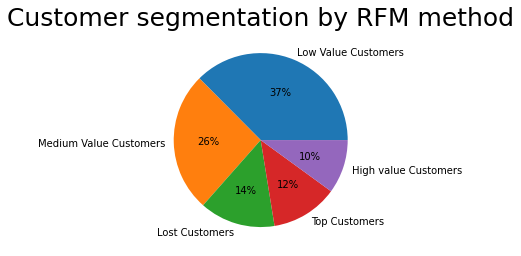

In [ ]:
# một biểu đồ hình tròn để hiển thị tất cả các phân khúc khách hàng.
fig = plt.pie(rfm.Segment.value_counts(), labels=rfm.Segment.value_counts().index,autopct='%.0f%%')
plt.title('Customer segmentation by RFM method', fontsize=25)
plt.set_cmap('winter')

In [ ]:
# merge bảng rfm và bảng DCustomer
df_data1 = pd.merge(df_DCustomer,rfm, on = ['CustomerKey'] )
df_data1.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,DateFirstPurchase,CommuteDistance,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,score,Segment
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,2011-01-19,1-2 Miles,274,3,8248.99,2,5,5,4.55,Top Customers
1,11001,37,AW00011001,Eugene,Huang,1976-05-10,S,M,eugene10@adventure-works.com,60000,...,2011-01-15,0-1 Miles,53,3,6383.88,5,5,5,5.00,Top Customers
2,11002,31,AW00011002,Ruben,Torres,1971-02-09,M,M,ruben35@adventure-works.com,60000,...,2011-01-07,2-5 Miles,343,3,8114.04,1,5,5,4.40,High value Customers
3,11003,11,AW00011003,Christy,Zhu,1973-08-14,S,F,christy12@adventure-works.com,70000,...,2010-12-29,5-10 Miles,267,3,8139.29,2,5,5,4.55,Top Customers
4,11004,19,AW00011004,Elizabeth,Johnson,1979-08-05,S,F,elizabeth5@adventure-works.com,80000,...,2011-01-23,1-2 Miles,276,3,8196.01,2,5,5,4.55,Top Customers


In [ ]:
# merge bảng vừa tạo ở trên với bảng DGeography
df_data2 = pd.merge(df_data1,df_DGeography, on = ['GeographyKey'] )
df_data2.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,score,Segment,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,4.55,Top Customers,Rockhampton,QLD,Queensland,AU,Australia,4700,9,198.51.100.27
1,11360,26,AW00011360,Tyrone,Serrano,1984-01-30,S,M,tyrone15@adventure-works.com,10000,...,5.00,Top Customers,Rockhampton,QLD,Queensland,AU,Australia,4700,9,198.51.100.27
2,11368,26,AW00011368,Edward,Miller,1984-05-24,S,M,edward28@adventure-works.com,10000,...,5.00,Top Customers,Rockhampton,QLD,Queensland,AU,Australia,4700,9,198.51.100.27
3,11371,26,AW00011371,Lacey,Jai,1983-11-24,M,F,lacey1@adventure-works.com,20000,...,3.01,Medium Value Customers,Rockhampton,QLD,Queensland,AU,Australia,4700,9,198.51.100.27
4,11909,26,AW00011909,Nichole,She,1971-08-10,M,F,nichole0@adventure-works.com,80000,...,4.70,Top Customers,Rockhampton,QLD,Queensland,AU,Australia,4700,9,198.51.100.27


In [ ]:
#merge bảng data2 với bảng FactSales
df_data3 = pd.merge(df_data2,df_FSales, on = ['CustomerKey'] )
df_data3.head(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,2011-01-19,2011-01-31,2011-01-26
1,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,0,1265.6195,1265.6195,2319.99,185.5992,57.9998,2013-01-18,2013-01-30,2013-01-25
2,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,0,8.2205,8.2205,21.98,1.7584,0.5495,2013-01-18,2013-01-30,2013-01-25
3,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,0,1481.9379,1481.9379,2384.07,190.7256,59.6018,2013-05-03,2013-05-15,2013-05-10
4,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,0,10.8423,10.8423,28.99,2.3192,0.7248,2013-05-03,2013-05-15,2013-05-10


In [ ]:
df_data3['profit'] = df_data3['SalesAmount'] - df_data3['TotalProductCost'] - df_data3['TaxAmt']
df_data3.head(10)

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate,profit
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,2011-01-19,2011-01-31,2011-01-26,1215.8364
1,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,1265.6195,1265.6195,2319.99,185.5992,57.9998,2013-01-18,2013-01-30,2013-01-25,868.7713
2,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,8.2205,8.2205,21.98,1.7584,0.5495,2013-01-18,2013-01-30,2013-01-25,12.0011
3,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,1481.9379,1481.9379,2384.07,190.7256,59.6018,2013-05-03,2013-05-15,2013-05-10,711.4065
4,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,10.8423,10.8423,28.99,2.3192,0.7248,2013-05-03,2013-05-15,2013-05-10,15.8285
5,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,1.8663,1.8663,4.99,0.3992,0.1248,2013-05-03,2013-05-15,2013-05-10,2.7245
6,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,13.0863,13.0863,34.99,2.7992,0.8748,2013-05-03,2013-05-15,2013-05-10,19.1045
7,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,0,41.5723,41.5723,53.99,4.3192,1.3498,2013-05-03,2013-05-15,2013-05-10,8.0985
8,11360,26,AW00011360,Tyrone,Serrano,1984-01-30,S,M,tyrone15@adventure-works.com,10000,...,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,2011-06-27,2011-07-09,2011-07-04,1215.8364
9,11360,26,AW00011360,Tyrone,Serrano,1984-01-30,S,M,tyrone15@adventure-works.com,10000,...,0,419.7784,419.7784,769.49,61.5592,19.2373,2013-08-28,2013-09-09,2013-09-04,288.1524


In [ ]:
# Tạo cột mới cho cột tuổi
df_data3['BirthDate']= pd.to_datetime(df_data3['BirthDate'])
import datetime
CURRENT_TIME = datetime.datetime.now()
def get_age(birth_date,today=CURRENT_TIME):
    y=today-birth_date
    return y.days//365
df_data3['Age']=df_data3['BirthDate'].apply(lambda x: get_age(x))

df_data3.head(10)

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate,profit,Age
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,2011-01-19,2011-01-31,2011-01-26,1215.8364,50
1,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,2013-01-18,2013-01-30,2013-01-25,868.7713,50
2,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,8.2205,8.2205,21.98,1.7584,0.5495,2013-01-18,2013-01-30,2013-01-25,12.0011,50
3,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,2013-05-03,2013-05-15,2013-05-10,711.4065,50
4,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,10.8423,10.8423,28.99,2.3192,0.7248,2013-05-03,2013-05-15,2013-05-10,15.8285,50
5,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1.8663,1.8663,4.99,0.3992,0.1248,2013-05-03,2013-05-15,2013-05-10,2.7245,50
6,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,13.0863,13.0863,34.99,2.7992,0.8748,2013-05-03,2013-05-15,2013-05-10,19.1045,50
7,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,41.5723,41.5723,53.99,4.3192,1.3498,2013-05-03,2013-05-15,2013-05-10,8.0985,50
8,11360,26,AW00011360,Tyrone,Serrano,1984-01-30,S,M,tyrone15@adventure-works.com,10000,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,2011-06-27,2011-07-09,2011-07-04,1215.8364,38
9,11360,26,AW00011360,Tyrone,Serrano,1984-01-30,S,M,tyrone15@adventure-works.com,10000,...,419.7784,419.7784,769.49,61.5592,19.2373,2013-08-28,2013-09-09,2013-09-04,288.1524,38


In [ ]:
# Tạo nhóm tuổi mới
def cohort(Age):
    if Age < 30:
        return 'Under 30'
    elif Age <= 40:
        return '30-39'
    elif Age <= 50:
        return '40-49'
    elif Age < 60:
        return '50-59'
    else:
        return "60+"

df_data3['Age_group'] = df_data3['Age'].apply(cohort)
df_data3

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate,profit,Age,Age_group
0,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1912.1544,3399.99,271.9992,84.9998,2011-01-19,2011-01-31,2011-01-26,1215.8364,50,40-49
1,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1265.6195,2319.99,185.5992,57.9998,2013-01-18,2013-01-30,2013-01-25,868.7713,50,40-49
2,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,8.2205,21.98,1.7584,0.5495,2013-01-18,2013-01-30,2013-01-25,12.0011,50,40-49
3,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,1481.9379,2384.07,190.7256,59.6018,2013-05-03,2013-05-15,2013-05-10,711.4065,50,40-49
4,11000,26,AW00011000,Jon,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,...,10.8423,28.99,2.3192,0.7248,2013-05-03,2013-05-15,2013-05-10,15.8285,50,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,28806,595,AW00028806,Randall,Hernandez,1979-05-19,S,M,randall5@adventure-works.com,40000,...,1.4923,3.99,0.3192,0.0998,2013-03-21,2013-04-02,2013-03-28,2.1785,43,40-49
60394,28806,595,AW00028806,Randall,Hernandez,1979-05-19,S,M,randall5@adventure-works.com,40000,...,13.0863,34.99,2.7992,0.8748,2013-03-21,2013-04-02,2013-03-28,19.1045,43,40-49
60395,28859,594,AW00028859,Micah,Cai,1972-04-07,S,M,micah9@adventure-works.com,80000,...,2171.2942,3578.27,286.2616,89.4568,2011-06-19,2011-07-01,2011-06-26,1120.7142,50,40-49
60396,28859,594,AW00028859,Micah,Cai,1972-04-07,S,M,micah9@adventure-works.com,80000,...,461.4448,742.35,59.3880,18.5588,2013-05-29,2013-06-10,2013-06-05,221.5172,50,40-49


In [ ]:
#Lấy ra những cột cần để phân tích từ bảng đã merge phía trên
important_cols=['CustomerKey','FirstName','LastName','City','StateProvinceName','EnglishCountryRegionName',
                'Age','Age_group','EnglishEducation','EnglishOccupation','Gender','MaritalStatus','YearlyIncome','Recency','Frequency','Monetary','score','Segment','SalesAmount','profit']

In [ ]:
# tạo bảng với những cột vừa lấy ra
df_analysis=df_data3[important_cols]
df_analysis

,CustomerKey,FirstName,LastName,City,StateProvinceName,EnglishCountryRegionName,Age,Age_group,EnglishEducation,EnglishOccupation,Gender,MaritalStatus,YearlyIncome,Recency,Frequency,Monetary,score,Segment,SalesAmount,profit
0,11000,Jon,Yang,Rockhampton,Queensland,Australia,50,40-49,Bachelors,Professional,M,M,90000,274,3,8248.99,4.55,Top Customers,3399.99,1215.8364
1,11000,Jon,Yang,Rockhampton,Queensland,Australia,50,40-49,Bachelors,Professional,M,M,90000,274,3,8248.99,4.55,Top Customers,2319.99,868.7713
2,11000,Jon,Yang,Rockhampton,Queensland,Australia,50,40-49,Bachelors,Professional,M,M,90000,274,3,8248.99,4.55,Top Customers,21.98,12.0011
3,11000,Jon,Yang,Rockhampton,Queensland,Australia,50,40-49,Bachelors,Professional,M,M,90000,274,3,8248.99,4.55,Top Customers,2384.07,711.4065
4,11000,Jon,Yang,Rockhampton,Queensland,Australia,50,40-49,Bachelors,Professional,M,M,90000,274,3,8248.99,4.55,Top Customers,28.99,15.8285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,28806,Randall,Hernandez,Cedar City,Utah,United States,43,40-49,Graduate Degree,Skilled Manual,M,S,40000,317,1,63.97,2.13,Low Value Customers,3.99,2.1785
60394,28806,Randall,Hernandez,Cedar City,Utah,United States,43,40-49,Graduate Degree,Skilled Manual,M,S,40000,317,1,63.97,2.13,Low Value Customers,34.99,19.1045
60395,28859,Micah,Cai,Bountiful,Utah,United States,50,40-49,Bachelors,Skilled Manual,M,S,80000,248,2,4355.61,4.55,Top Customers,3578.27,1120.7142
60396,28859,Micah,Cai,Bountiful,Utah,United States,50,40-49,Bachelors,Skilled Manual,M,S,80000,248,2,4355.61,4.55,Top Customers,742.35,221.5172


Text(0.5, 1.0, 'Total Profit within Segment')

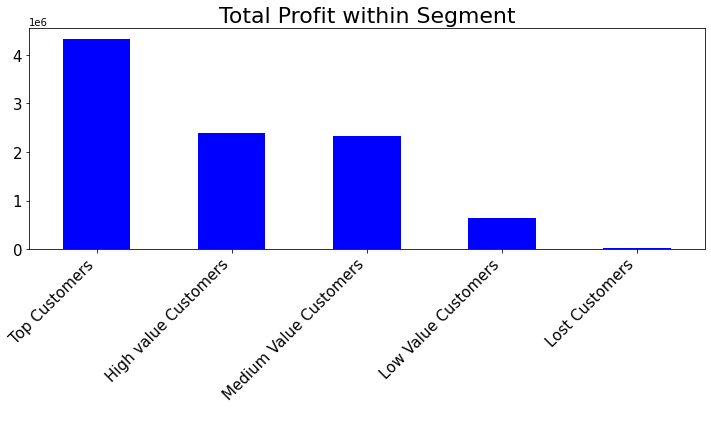

In [ ]:
# trực quan hóa Total Profit theo Segment
segment_profit =df_analysis.groupby('Segment').sum().sort_values('profit',ascending=False).iloc[:,8]
plt.figure(figsize=(10,6), tight_layout=True)
fig = segment_profit.plot(kind='bar', cmap='winter', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel(' ')
plt.title('Total Profit within Segment', fontsize=22)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

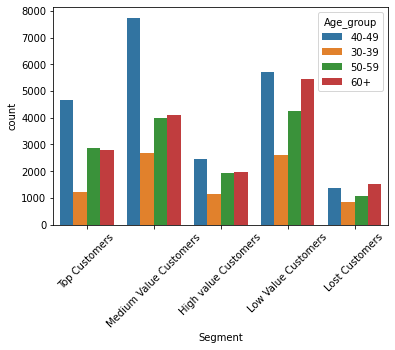

In [ ]:
#chart thể hiện phân bố nhóm tuổi trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_analysis, x= 'Segment', hue='Age_group')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

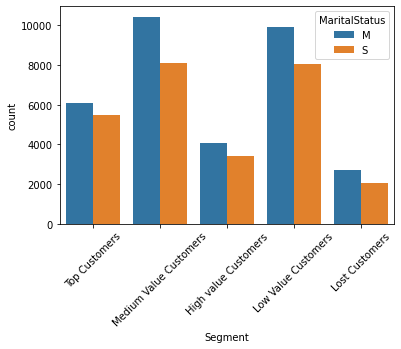

In [ ]:
#chart thể hiện married/single trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_analysis, x= 'Segment', hue='MaritalStatus')
plt.xticks(rotation=45)

In [ ]:
# đếm số lượng Male và Female trong từng phân khúc
df_datagender = pd.DataFrame(df_analysis.groupby(['Segment','Gender'])['Gender'].count())
df_datagender

Gender
Segment                Gender        
High value Customers   F         3585
                       M         3891
Lost Customers         F         2354
                       M         2439
Low Value Customers    F         8853
                       M         9169
Medium Value Customers F         9199
                       M         9353
Top Customers          F         6026
                       M         5529

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

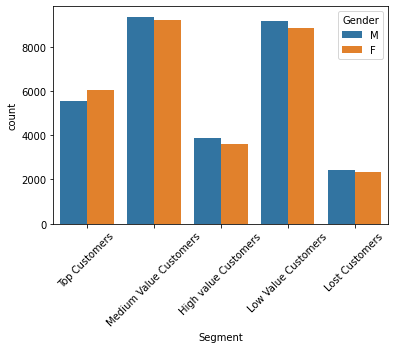

In [ ]:
#chart thể hiện giới tính trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_analysis, x= 'Segment', hue='Gender')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

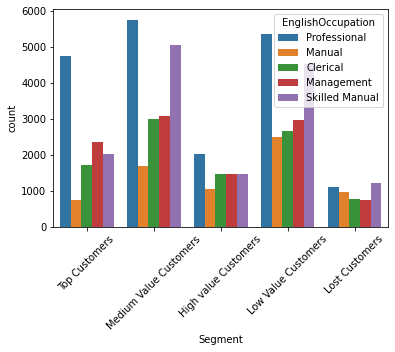

In [ ]:
#chart thể hiện phân bố nghề nghiệp trong từng phân khúc
sns.countplot(data=df_analysis, x= 'Segment', hue='EnglishOccupation')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

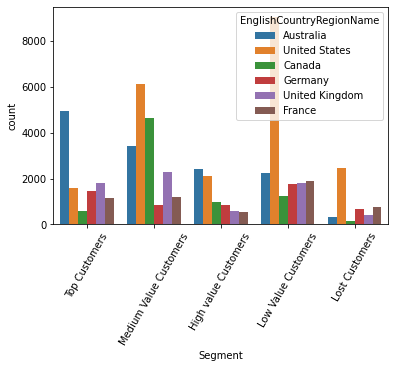

In [ ]:
#chart thể hiện phân bố nước trong từng phân khúc
sns.countplot(data=df_analysis, x= 'Segment', hue='EnglishCountryRegionName')
plt.xticks(rotation=60)

In [ ]:
#lấy ra các cột cần tính trung bình để phân tích
cols = ['Segment','Age','YearlyIncome','Monetary']
df_avgdata = df_analysis[cols]
df_avgdata

,Segment,Age,YearlyIncome,Monetary
0,Top Customers,50,90000,8248.99
1,Top Customers,50,90000,8248.99
2,Top Customers,50,90000,8248.99
3,Top Customers,50,90000,8248.99
4,Top Customers,50,90000,8248.99
...,...,...,...,...
60393,Low Value Customers,43,40000,63.97
60394,Low Value Customers,43,40000,63.97
60395,Top Customers,50,80000,4355.61
60396,Top Customers,50,80000,4355.61


In [ ]:
#tính trung bình các cột Age, YearlyIncome, và Monetary (là giá trị đơn hàng ở đây được hiểu như chi tiêu của khách hàng)
df_avgdata = df_avgdata.groupby(['Segment'], as_index=False).mean()
df_avgdata

,Segment,Age,YearlyIncome,Monetary
0,High value Customers,52.673488,58184.858213,3822.074874
1,Lost Customers,53.721260,51139.161277,30.155429
2,Low Value Customers,53.607757,55640.883365,294.062634
3,Medium Value Customers,51.499299,58189.952566,1186.373188
4,Top Customers,52.143228,73065.339680,6068.560908


In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

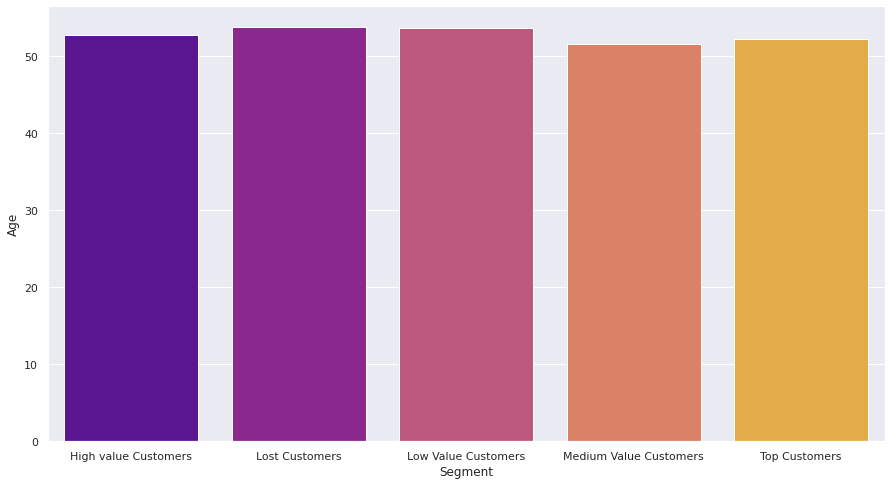

In [ ]:
ax=sns.barplot(x='Segment',y='Age',palette="plasma",data=df_avgdata)
# ax.bar_label(ax.containers[0])

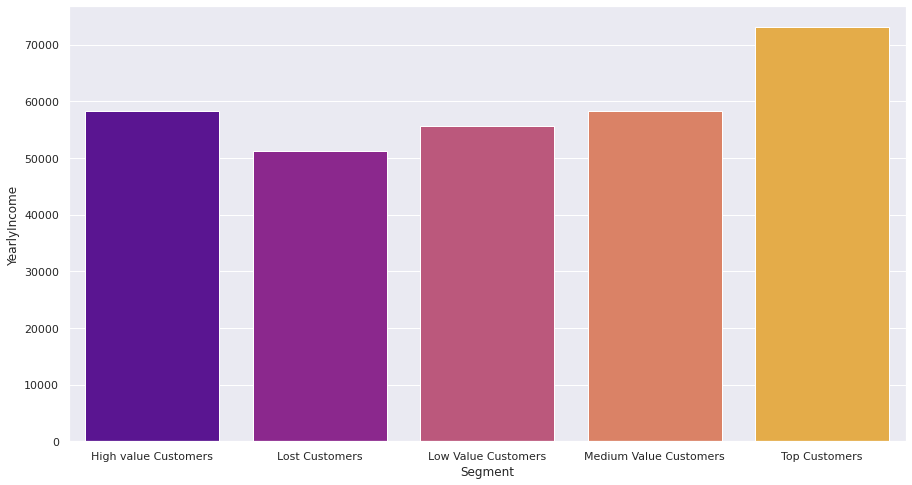

In [ ]:
sns.barplot(x='Segment',y='YearlyIncome',palette="plasma",data=df_avgdata)

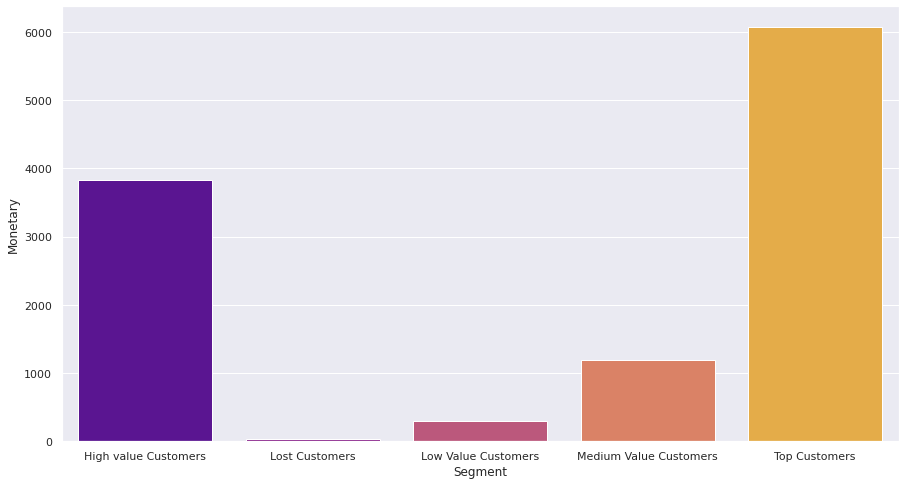

In [ ]:
sns.barplot(x='Segment',y='Monetary',palette="plasma",data=df_avgdata)

##Kmean_Clustering

In [ ]:
# sao chép dữ liệu vào biến mới
df_kmeans = rfm.copy()
# chỉ lấy các cột có liên quan
df_kmeans = df_kmeans.iloc[:,:3]
df_kmeans.head()

,Recency,Frequency,Monetary
CustomerKey,,,
11000,274,3,8248.99
11001,53,3,6383.88
11002,343,3,8114.04
11003,267,3,8139.29
11004,276,3,8196.01


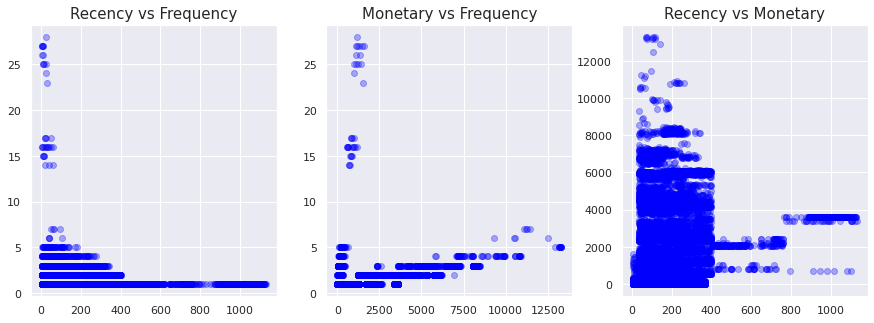

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df_kmeans.Recency, df_kmeans.Frequency, color='blue', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.Monetary, df_kmeans.Frequency, color='blue', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.Recency, df_kmeans.Monetary, color='blue', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


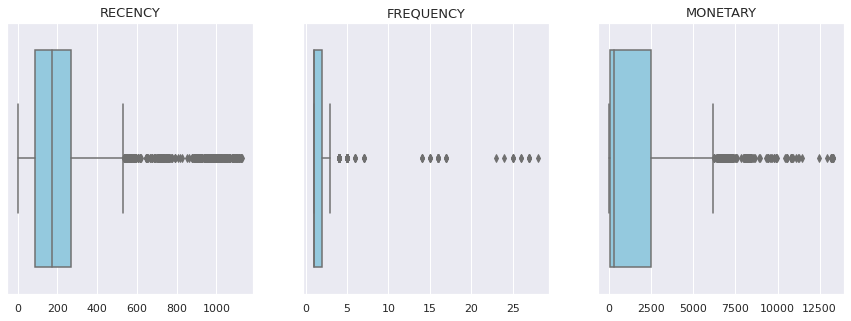

In [ ]:
# kiểm tra sự phân phối của các biến
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Xóa outliers for Monetary
Q1 = df_kmeans.Monetary.quantile(0.05)
Q3 = df_kmeans.Monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.Monetary >= Q1 - 1.5*IQR) & (df_kmeans.Monetary <= Q3 + 1.5*IQR)]

# Xóa outliers for Recency
Q1 = df_kmeans.Recency.quantile(0.05)
Q3 = df_kmeans.Recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.Recency >= Q1 - 1.5*IQR) & (df_kmeans.Recency <= Q3 + 1.5*IQR)]

# Xóa outliers for Frequency
Q1 = df_kmeans.Frequency.quantile(0.05)
Q3 = df_kmeans.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.Frequency >= Q1 - 1.5*IQR) & (df_kmeans.Frequency <= Q3 + 1.5*IQR)]

###Scaling dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling các biến và lưu trữ nó trong các df khác nhau
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# chuyển đổi nó thành khung dữ liệu
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,0.805031,2.253885,3.149414
1,-1.145288,2.253885,2.271095
2,1.413954,2.253885,3.085863
3,0.743256,2.253885,3.097754
4,0.822681,2.253885,3.124465


###Phân cụm

#### Thử với K=5 

Ban đầu do chưa có đủ dự kiện để chia cụm, nhóm chúng em nhóm dữ liệu thành 5 cụm như trong 5 phân khúc khách hàng đã chia ở RFM. Sau đó, nhóm chúng em xem xét các phương pháp khác nhau để quyết định giá trị tối ưu cho k.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Kmeans vơi K=5
model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [ ]:
# check
model_clus5.labels_

array([4, 4, 4, ..., 2, 1, 1], dtype=int32)

In [ ]:
df_kmeans['Clusters'] = model_clus5.labels_
df_kmeans.head(20)

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,274,3,8248.99,4
11001,53,3,6383.88,4
11002,343,3,8114.04,4
11003,267,3,8139.29,4
11004,276,3,8196.01,4
11005,275,3,8121.33,4
11006,263,3,8119.03,4
11007,319,3,8211.00,4
11008,336,3,8106.31,4


In [ ]:
df_kmeans.groupby('Clusters').mean().round(0)

,Recency,Frequency,Monetary
Clusters,,,
0,199.0,2.0,4328.0
1,303.0,1.0,555.0
2,106.0,1.0,490.0
3,102.0,2.0,646.0
4,135.0,3.0,6850.0


####Tìm số lượng nhóm (k) tối ưu bằng thuật toán

##### Elbow để lấy đúng số lượng Cụm

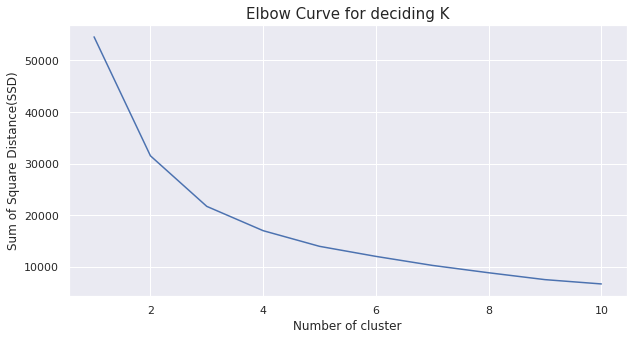

In [ ]:
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

Từ biểu đồ trên, nhóm chúng em dự đoán k=3 dựa vào đường khuỷa tay. Tuy nhiên, để đảm bảo tính khách quan, nhóm chúng em sẽ kiểm tra lại với Silhouette Analysis


#####Silhouette Analysis


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4595866991194895
For n_clusters=3, the silhouette score is 0.41194050942332405
For n_clusters=4, the silhouette score is 0.43307611648752714
For n_clusters=5, the silhouette score is 0.4548582786489094
For n_clusters=6, the silhouette score is 0.45861924176300845
For n_clusters=7, the silhouette score is 0.46945795765046516
For n_clusters=8, the silhouette score is 0.42378290013898173
For n_clusters=9, the silhouette score is 0.4317913008760602
For n_clusters=10, the silhouette score is 0.4407970079803664


Từ phân tích Silhouette, nhóm em nhận thấy giá trị cụm tốt nhất khi số lượng cụm sẽ là 3

#### Xây dựng model với số cụm là 3

In [ ]:
#Kmeans với k =3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['Clusters'] = model_clus3.labels_
df_kmeans.head(20)

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,274,3,8248.99,0
11001,53,3,6383.88,0
11002,343,3,8114.04,0
11003,267,3,8139.29,0
11004,276,3,8196.01,0
11005,275,3,8121.33,0
11006,263,3,8119.03,0
11007,319,3,8211.00,0
11008,336,3,8106.31,0


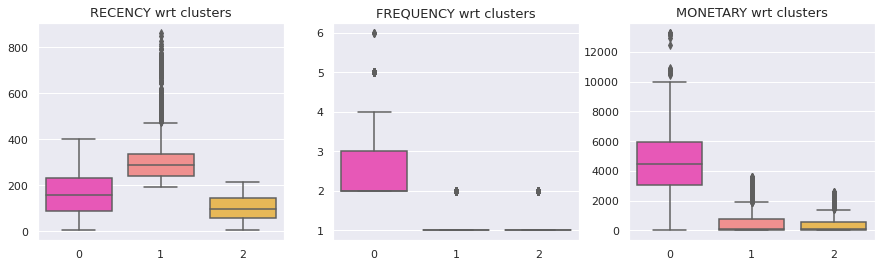

In [ ]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['Clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_kmeans, x=df_kmeans["Recency"], y=df_kmeans["Frequency"], z=df_kmeans["Monetary"], color=df_kmeans["Clusters"])
fig.show()

####Phân tích các cụm

Số lượng phần tử (khách hàng) trong từng cụm (cluster)


In [ ]:
round(df_kmeans.Clusters.value_counts())

2    7407
1    5868
0    4920
Name: Clusters, dtype: int64

Số lượng phần trăm (khách hàng) theo từng cụm

In [ ]:
round(df_kmeans.Clusters.value_counts(normalize=True)*100,0)

2    41.0
1    32.0
0    27.0
Name: Clusters, dtype: float64

#####Phân tích cụm 0

In [ ]:
df_0 = df_kmeans[df_kmeans['Clusters']==0]
df_0

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,274,3,8248.9900,0
11001,53,3,6383.8800,0
11002,343,3,8114.0400,0
11003,267,3,8139.2900,0
11004,276,3,8196.0100,0
...,...,...,...,...
29398,358,2,3964.4700,0
29399,328,2,3936.4700,0
29400,322,2,3992.4600,0


In [ ]:
#Mô tả tứ phân vị của cụm 0
df_0.describe()

,Recency,Frequency,Monetary,Clusters
count,4920.000000,4920.000000,4920.000000,4920.0
mean,168.093496,2.331707,4371.694052,0.0
std,94.638086,0.595547,2050.072212,0.0
min,4.000000,2.000000,34.560000,0.0
25%,89.000000,2.000000,3080.290000,0.0
50%,158.000000,2.000000,4461.778900,0.0
75%,234.000000,3.000000,5923.230000,0.0
max,400.000000,6.000000,13295.380000,0.0


##### Phân tích cụm 1

In [ ]:
df_1 = df_kmeans[df_kmeans['Clusters']==1]
df_1

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11014,277,2,138.4500,1
11015,379,1,2500.9700,1
11016,357,1,2332.2800,1
11020,399,1,2316.9700,1
11021,374,1,2371.9600,1
...,...,...,...,...
29478,220,1,2398.0500,1
29479,515,1,2049.0982,1
29480,199,1,2442.0300,1


In [ ]:
#Mô tả tứ phân vị của cụm 1
df_1.describe()

,Recency,Frequency,Monetary,Clusters
count,5868.000000,5868.000000,5868.000000,5868.0
mean,298.387185,1.082311,574.938109,1.0
std,82.274129,0.274861,838.171181,0.0
min,195.000000,1.000000,2.290000,1.0
25%,242.000000,1.000000,36.270000,1.0
50%,287.000000,1.000000,75.970000,1.0
75%,335.000000,1.000000,782.990000,1.0
max,864.000000,2.000000,3578.270000,1.0


#####Phân tích cụm 2

In [ ]:
df_2 = df_kmeans[df_kmeans['Clusters']==2]
df_2

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11012,109,2,81.26,2
11013,11,2,113.96,2
11023,18,2,122.24,2
11024,190,2,56.51,2
11043,167,2,47.98,2
...,...,...,...,...
29464,109,1,756.33,2
29465,104,1,791.32,2
29470,58,1,60.47,2


In [ ]:
#Mô tả tứ phân vị của cụm 2
df_2.describe()

,Recency,Frequency,Monetary,Clusters
count,7407.000000,7407.000000,7407.000000,7407.0
mean,100.943837,1.191441,475.742702,2.0
std,52.951071,0.393462,730.586132,0.0
min,4.000000,1.000000,2.290000,2.0
25%,57.000000,1.000000,38.880000,2.0
50%,97.000000,1.000000,78.960000,2.0
75%,145.000000,1.000000,588.960000,2.0
max,213.000000,2.000000,2564.920000,2.0


#####Sắp xếp phân khúc khách hàng theo K-means

In [ ]:
df_kmeans["Segment_new"] = np.where(df_kmeans['Clusters'] ==
                                      1, "High value Customers",
                                      (np.where(
                                        df_kmeans['Clusters'] == 2,
                                        "Medium value Customers",
                                         "Low Value Customers")))
df_kmeans[['Recency',	'Frequency',	'Monetary','Clusters','Segment_new']].head(20)

,Recency,Frequency,Monetary,Clusters,Segment_new
CustomerKey,,,,,
11000,274,3,8248.99,0,Low Value Customers
11001,53,3,6383.88,0,Low Value Customers
11002,343,3,8114.04,0,Low Value Customers
11003,267,3,8139.29,0,Low Value Customers
11004,276,3,8196.01,0,Low Value Customers
11005,275,3,8121.33,0,Low Value Customers
11006,263,3,8119.03,0,Low Value Customers
11007,319,3,8211.00,0,Low Value Customers
11008,336,3,8106.31,0,Low Value Customers


####Trực quan hoắ dữ liệu từ việc phân tích 3 phân khúc khách hàng theo cách chia mới

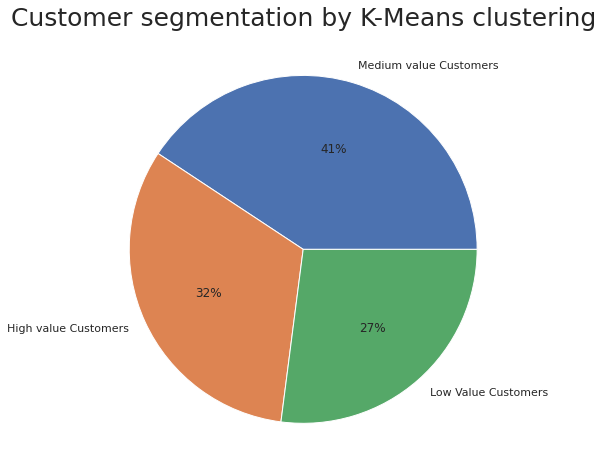

In [ ]:
# a pie plot 
fig = plt.pie(df_kmeans.Segment_new.value_counts(), labels=df_kmeans.Segment_new.value_counts().index,autopct='%.0f%%')
plt.title('Customer segmentation by K-Means clustering', fontsize=25)
plt.set_cmap('winter')

In [ ]:
df_Cus_Kmean = df_DCustomer[['CustomerKey','BirthDate','Gender','MaritalStatus','YearlyIncome','GeographyKey','EnglishOccupation']]
df_Geo_Kmean=df_DGeography[['GeographyKey','EnglishCountryRegionName']]

df1_Kmean=df_kmeans.merge(df_Cus_Kmean,on=(['CustomerKey']))
df_Kmean=df1_Kmean.merge(df_Geo_Kmean, on=(['GeographyKey']))

df_Kmean["BirthDate"] = pd.to_datetime(df["BirthDate"])
df_Kmean['Age']= 2014-df_Kmean['BirthDate'].dt.year
df_Kmean

,CustomerKey,Recency,Frequency,Monetary,Clusters,Segment_new,BirthDate,Gender,MaritalStatus,YearlyIncome,GeographyKey,EnglishOccupation,EnglishCountryRegionName,Age
0,11000,274,3,8248.9900,0,Low Value Customers,1971-10-06,M,M,90000,26,Professional,Australia,43
1,11360,41,3,5025.8000,0,Low Value Customers,1976-05-10,M,S,10000,26,Manual,Australia,38
2,11368,62,3,5106.2400,0,Low Value Customers,1971-02-09,M,S,10000,26,Manual,Australia,43
3,11371,35,2,74.9800,2,Medium value Customers,1973-08-14,F,M,20000,26,Clerical,Australia,41
4,11909,184,3,8105.3100,0,Low Value Customers,1979-08-05,F,M,80000,26,Management,Australia,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,27040,364,1,7.2800,1,High value Customers,1975-02-08,M,M,20000,524,Clerical,United States,39
18191,27372,33,1,38.9800,2,Medium value Customers,1975-05-19,M,S,30000,402,Professional,United States,39
18192,27421,453,1,2049.0982,1,High value Customers,1973-04-25,F,S,60000,453,Professional,United States,41
18193,28806,317,1,63.9700,1,High value Customers,1972-03-05,M,S,40000,595,Skilled Manual,United States,42


In [ ]:
def cohort(Age):
    if Age < 30:
        return 'Under 30'
    elif Age <= 40:
        return '30-39'
    elif Age <= 50:
        return '40-49'
    elif Age < 60:
        return '50-59'
    else:
        return "60+"

df_Kmean['Age_group'] = df_Kmean['Age'].apply(cohort)
df_Kmean

,CustomerKey,Recency,Frequency,Monetary,Clusters,Segment_new,BirthDate,Gender,MaritalStatus,YearlyIncome,GeographyKey,EnglishOccupation,EnglishCountryRegionName,Age,Age_group
0,11000,274,3,8248.9900,0,Low Value Customers,1971-10-06,M,M,90000,26,Professional,Australia,43,40-49
1,11360,41,3,5025.8000,0,Low Value Customers,1976-05-10,M,S,10000,26,Manual,Australia,38,30-39
2,11368,62,3,5106.2400,0,Low Value Customers,1971-02-09,M,S,10000,26,Manual,Australia,43,40-49
3,11371,35,2,74.9800,2,Medium value Customers,1973-08-14,F,M,20000,26,Clerical,Australia,41,40-49
4,11909,184,3,8105.3100,0,Low Value Customers,1979-08-05,F,M,80000,26,Management,Australia,35,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,27040,364,1,7.2800,1,High value Customers,1975-02-08,M,M,20000,524,Clerical,United States,39,30-39
18191,27372,33,1,38.9800,2,Medium value Customers,1975-05-19,M,S,30000,402,Professional,United States,39,30-39
18192,27421,453,1,2049.0982,1,High value Customers,1973-04-25,F,S,60000,453,Professional,United States,41,40-49
18193,28806,317,1,63.9700,1,High value Customers,1972-03-05,M,S,40000,595,Skilled Manual,United States,42,40-49


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

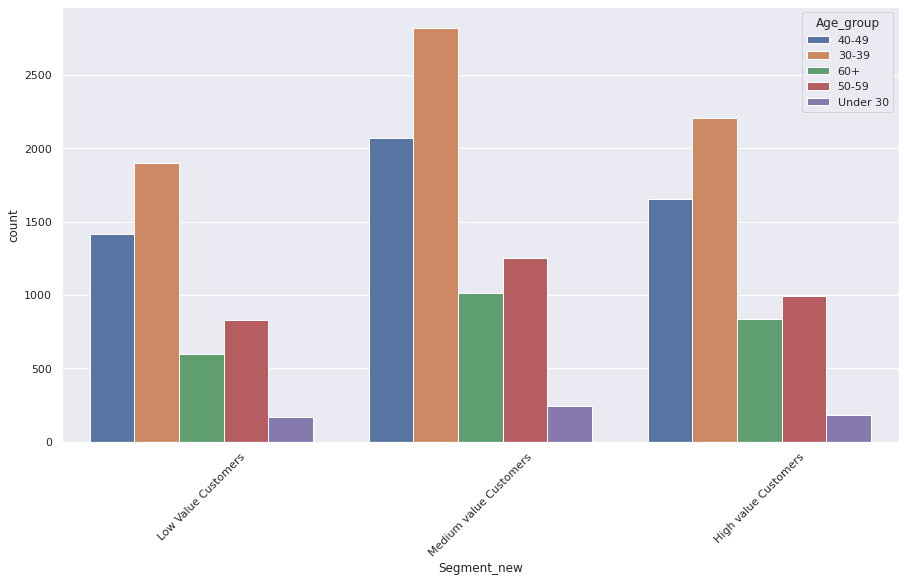

In [ ]:
#chart thể hiện phân bố nhóm tuổi trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_Kmean, x= 'Segment_new', hue='Age_group')
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

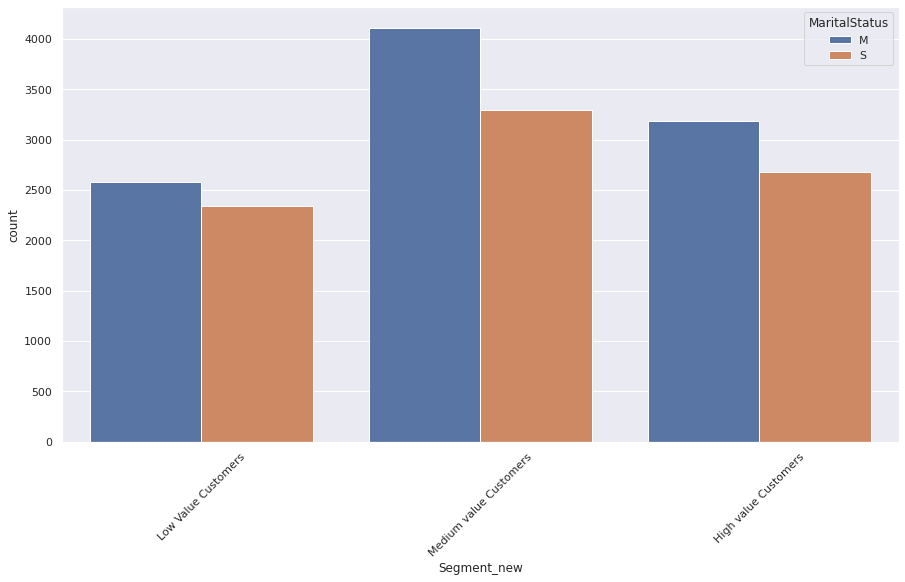

In [ ]:
#chart thể hiện married/single trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_Kmean, x= 'Segment_new', hue='MaritalStatus')
plt.xticks(rotation=45)

In [ ]:
# đếm số lượng Male và Female trong từng phân khúc
df_Kmeangender = pd.DataFrame(df_Kmean.groupby(['Segment_new','Gender'])['Gender'].count())
df_Kmeangender

Gender
Segment_new            Gender        
High value Customers   F         2892
                       M         2976
Low Value Customers    F         2471
                       M         2449
Medium value Customers F         3629
                       M         3778

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

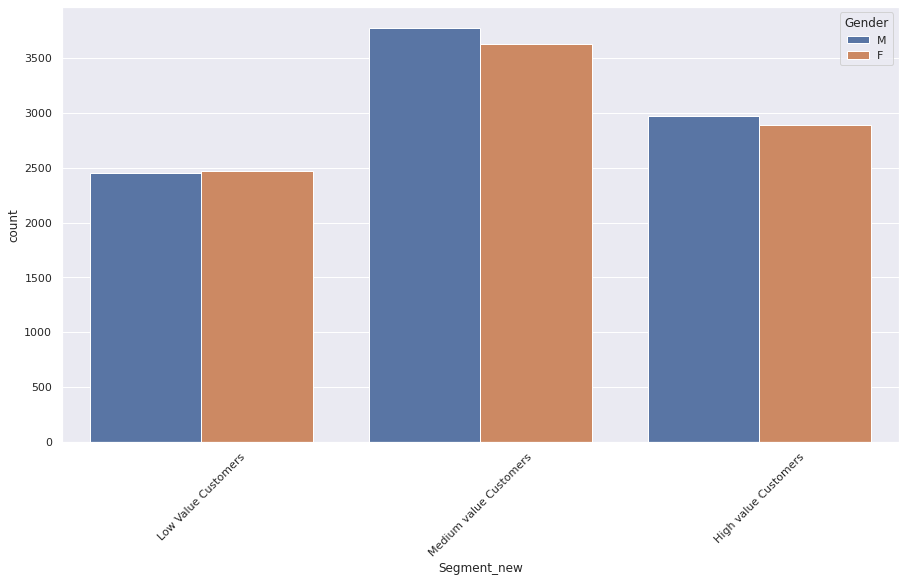

In [ ]:
#chart thể hiện giới tính trong từng phân khúc
import seaborn as sns
sns.countplot(data=df_Kmean, x= 'Segment_new', hue='Gender')
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

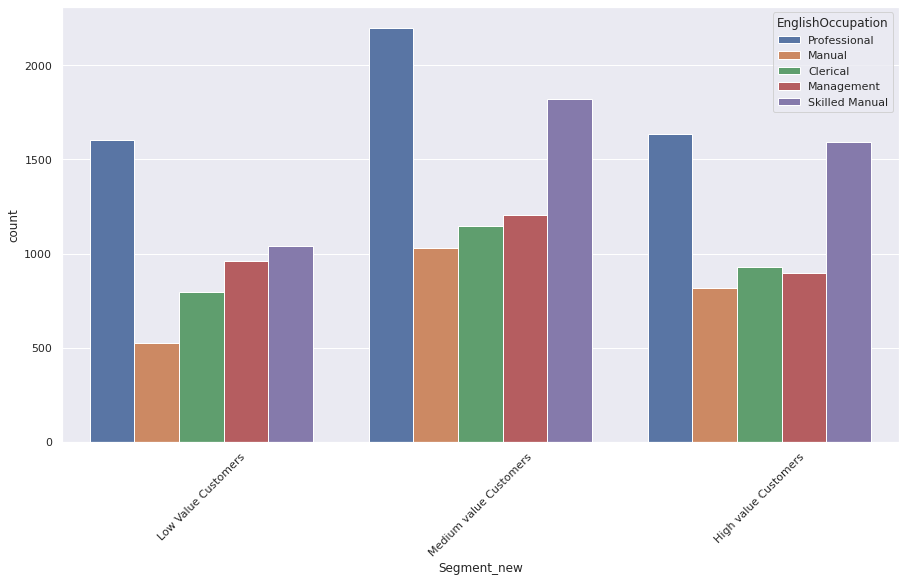

In [ ]:
#chart thể hiện phân bố nghề nghiệp trong từng phân khúc
sns.countplot(data=df_Kmean, x= 'Segment_new', hue='EnglishOccupation')
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

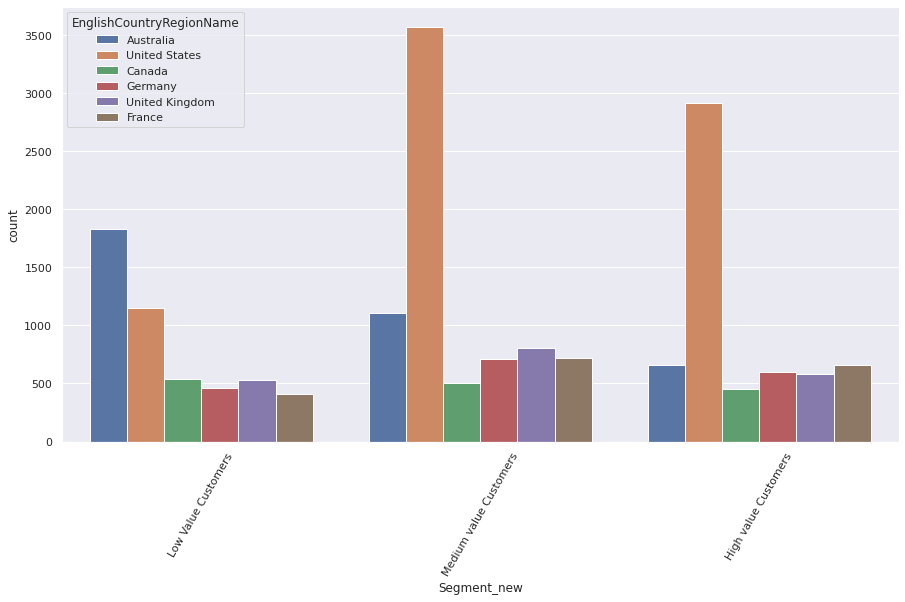

In [ ]:
#chart thể hiện phân bố nước trong từng phân khúc
sns.countplot(data=df_Kmean, x= 'Segment_new', hue='EnglishCountryRegionName')
plt.xticks(rotation=60)

In [ ]:
#lấy ra các cột cần tính trung bình để phân tích
cols = ['Segment_new','Age','YearlyIncome','Monetary']
df_avgKmean = df_Kmean[cols]
df_avgKmean

,Segment_new,Age,YearlyIncome,Monetary
0,Low Value Customers,43,90000,8248.9900
1,Low Value Customers,38,10000,5025.8000
2,Low Value Customers,43,10000,5106.2400
3,Medium value Customers,41,20000,74.9800
4,Low Value Customers,35,80000,8105.3100
...,...,...,...,...
18190,High value Customers,39,20000,7.2800
18191,Medium value Customers,39,30000,38.9800
18192,High value Customers,41,60000,2049.0982
18193,High value Customers,42,40000,63.9700


In [ ]:
#tính trung bình các cột Age, YearlyIncome, và Monetary (là giá trị đơn hàng ở đây được hiểu như chi tiêu của khách hàng)
df_avgKmean = df_avgKmean.groupby(['Segment_new'], as_index=False).mean()
df_avgKmean

,Segment_new,Age,YearlyIncome,Monetary
0,High value Customers,45.434049,54405.248807,574.938109
1,Low Value Customers,44.823577,63406.504065,4371.694052
2,Medium value Customers,45.209667,55817.469961,475.742702


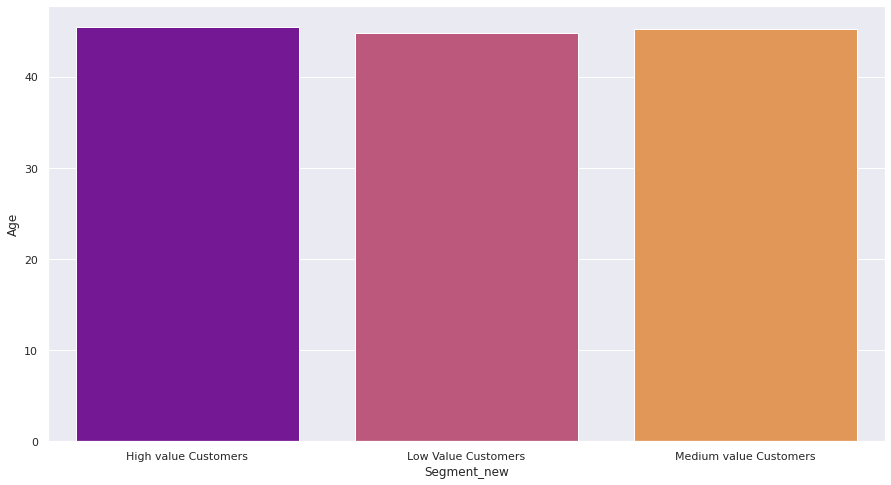

In [ ]:
sns.barplot(x='Segment_new',y='Age',palette="plasma",data=df_avgKmean)

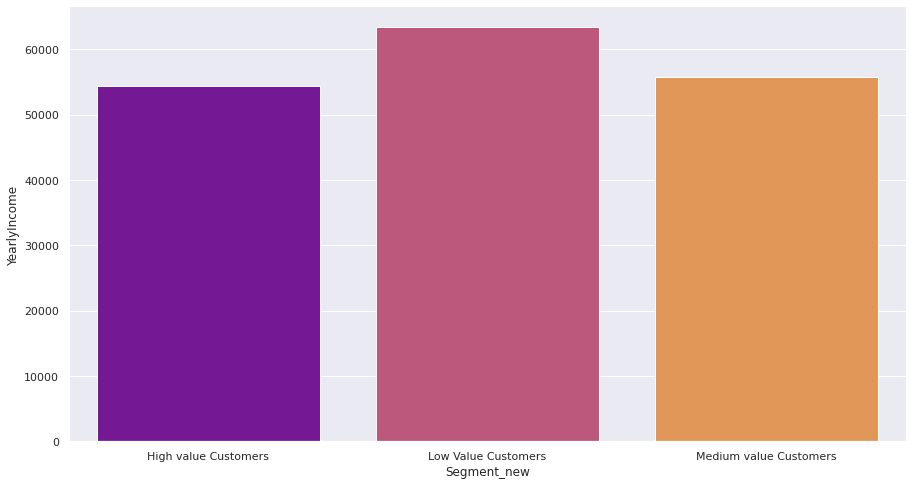

In [ ]:
sns.barplot(x='Segment_new',y='YearlyIncome',palette="plasma",data=df_avgKmean)


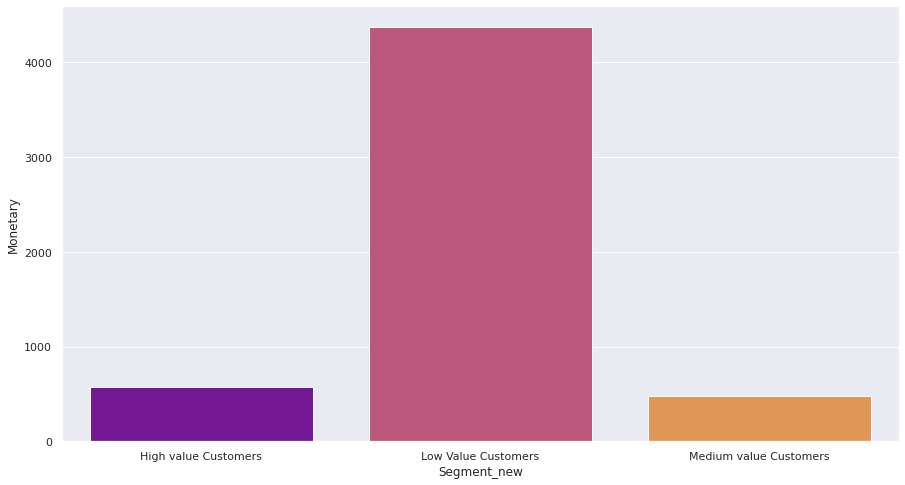

In [ ]:
sns.barplot(x='Segment_new',y='Monetary',palette="plasma",data=df_avgKmean)

#Phân tích sâu về khách hàng thông qua: Cohort Analysis & Churn rate

##Churn rate: tỷ lệ phần trăm thể hiện người mức độ rời bỏ của người dùng đối với công ty.

In [ ]:
#Churn cua 012012 -> Khach hang mua hang lan cuoi truoc 01062011 
df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2011,6,1)
np.count_nonzero(df)

343179

In [ ]:
#Khach hang mua lan dau truoc 01012012
df=df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2012,1,1)
np.count_nonzero(df)

2230

In [ ]:
#Khach hang mua lan dau tu 012012 den 062012
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2012,1,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2012,6,1)))

1150

CHURN RATES thang 01 nam 2012 = 128/230 = 5,7%


In [ ]:
#Churn cua 06012012 -> Khach hang mua hang lan cuoi truoc tu 062011 012012
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2011,6,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2012,1,1)))

134

In [ ]:
#Khach hang mua lan dau tu 062012 den 012013
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2012,6,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2013,1,1)))

2075

CHURN RATES thang 06 nam 2012 = 134/3252 = 4,1%

In [ ]:
#Churn cua 0102013 -> Khach hang mua hang lan cuoi truoc tu 012012 062012
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2012,1,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2012,6,1)))

83

In [ ]:
#Khach hang mua lan dau tu 01/2013 den 06/2013
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2013,1,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2013,6,1)))

4805

CHURN RATES thang 01 nam 2013 = 83/5193 = 1,6%

In [ ]:
#Churn cua 0602013 -> Khach hang mua hang lan cuoi truoc tu 06 2012 01/2013
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2012,6,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2013,1,1)))

204

In [ ]:
#Khach hang mua lan dau tu 06/2013 den 01/2014
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2013,6,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"min"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2014,1,1)))

7718

CHURN RATES thang 06 nam 2013 = 204/9915 = 2,1%

In [ ]:
#Churn cua 01/2014 -> Khach hang mua hang lan cuoi truoc tu 01/2013 06/2013
np.count_nonzero((df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) >=dt.datetime(2013,1,1)) 
& (df_FSales.groupby("CustomerKey").agg({"OrderDate":"max"}).rename(columns = {"OrderDate":"LastOrderDate"}) <dt.datetime(2013,6,1)))

5010

CHURN RATES thang 01 nam 2014 thì chưa đủ số ngày để tính được new customer từ tháng 01 -> tháng 06 năm 2014

In [ ]:
churnrates=[5.7,4.1,1.6,2.1]
new = [1150,2075,4805,7718]
churn = [128,134,83,204]
years = ['1/2012','6/2012','1/2013','6/2013']

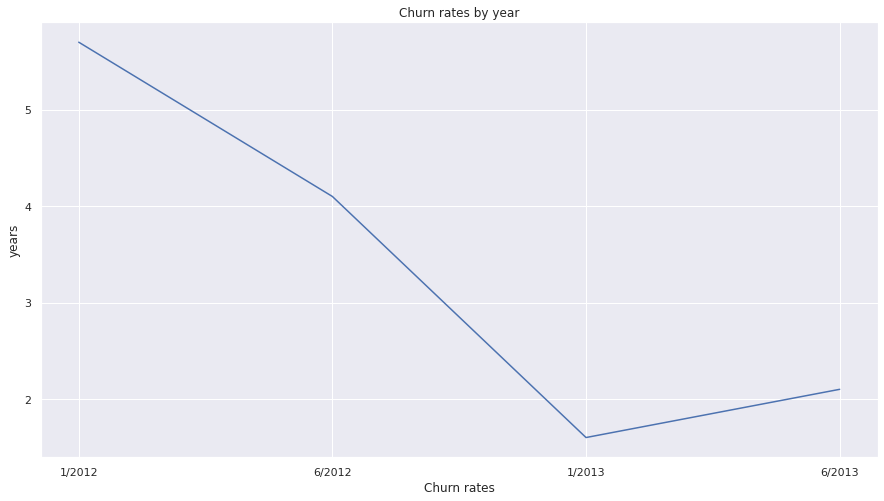

In [ ]:
import matplotlib.pyplot as plt

plt.plot(years,churnrates)
plt.title('Churn rates by year')
plt.xlabel('Churn rates')
plt.ylabel('years')
plt.show()

##Cohort Analysis

In [ ]:
df_cohort = df_FSales.copy()
df_cohort.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,2010-12-29,2011-01-10,2011-01-05
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,2010-12-29,2011-01-10,2011-01-05
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05


In [ ]:
#lấy chính xác giá trị tháng
df_cohort['OrderMonth'] = df_cohort['OrderDate'].dt.strftime('%Y-%m')
# chuyển đổi biến thành định dạng ngày giờ
df_cohort['OrderMonth'] = pd.to_datetime(df_cohort['OrderMonth'])

In [ ]:
# tạo biến thứ hai 'Tháng theo nhóm'
# nhận được ngày mua hàng đầu tiên cho mỗi khách hàng
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerKey')['OrderMonth'].transform('min')
# chuyển đổi biến thành định dạng ngày giờ
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            60398 non-null  int64         
 1   OrderDateKey          60398 non-null  int64         
 2   DueDateKey            60398 non-null  int64         
 3   ShipDateKey           60398 non-null  int64         
 4   CustomerKey           60398 non-null  int64         
 5   PromotionKey          60398 non-null  int64         
 6   CurrencyKey           60398 non-null  int64         
 7   SalesTerritoryKey     60398 non-null  int64         
 8   SalesOrderNumber      60398 non-null  object        
 9   SalesOrderLineNumber  60398 non-null  int64         
 10  RevisionNumber        60398 non-null  int64         
 11  OrderQuantity         60398 non-null  int64         
 12  UnitPrice             60398 non-null  float64       
 13  ExtendedAmount  

In [ ]:
df_cohort

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate,OrderMonth,CohortMonth
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.2700,286.2616,89.4568,2010-12-29,2011-01-10,2011-01-05,2010-12-01,2010-12-01
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05,2010-12-01,2010-12-01
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05,2010-12-01,2010-12-01
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,413.1463,413.1463,699.0982,55.9279,17.4775,2010-12-29,2011-01-10,2011-01-05,2010-12-01,2010-12-01
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29,2011-01-10,2011-01-05,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,20140128,20140209,20140204,15868,1,100,6,SO75122,1,...,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04,2014-01-01,2013-05-01
60394,225,20140128,20140209,20140204,15868,1,100,6,SO75122,2,...,6.9223,6.9223,8.9900,0.7192,0.2248,2014-01-28,2014-02-09,2014-02-04,2014-01-01,2013-05-01
60395,485,20140128,20140209,20140204,18759,1,100,6,SO75123,1,...,8.2205,8.2205,21.9800,1.7584,0.5495,2014-01-28,2014-02-09,2014-02-04,2014-01-01,2013-05-01
60396,486,20140128,20140209,20140204,18759,1,100,6,SO75123,2,...,59.4660,59.4660,159.0000,12.7200,3.9750,2014-01-28,2014-02-09,2014-02-04,2014-01-01,2013-05-01


In [ ]:
def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['OrderMonth'], df_cohort['CohortMonth'])

In [ ]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerKey', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,3.0,2.0
2011-01-01,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,21.0,24.0,7.0,8.0,5.0,12.0,25.0,27.0,NaN
2011-02-01,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,12.0,12.0,19.0,7.0,4.0,29.0,28.0,NaN,NaN
2011-03-01,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,24.0,16.0,18.0,13.0,6.0,25.0,NaN,NaN,NaN
2011-04-01,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,19.0,13.0,19.0,3.0,27.0,NaN,NaN,NaN,NaN
2011-05-01,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,15.0,21.0,11.0,4.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,23.0,17.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,18.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) 
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
2010-12-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,7.1,14.3,NaN,14.3,NaN,NaN,NaN,21.4,14.3
2011-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,14.6,16.7,4.9,5.6,3.5,8.3,17.4,18.8,NaN
2011-02-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6,8.3,8.3,13.2,4.9,2.8,20.1,19.4,NaN,NaN
2011-03-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,16.0,10.7,12.0,8.7,4.0,16.7,NaN,NaN,NaN
2011-04-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.3,12.1,8.3,12.1,1.9,17.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7,8.6,12.1,6.3,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,10.0,7.4,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,9.6,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


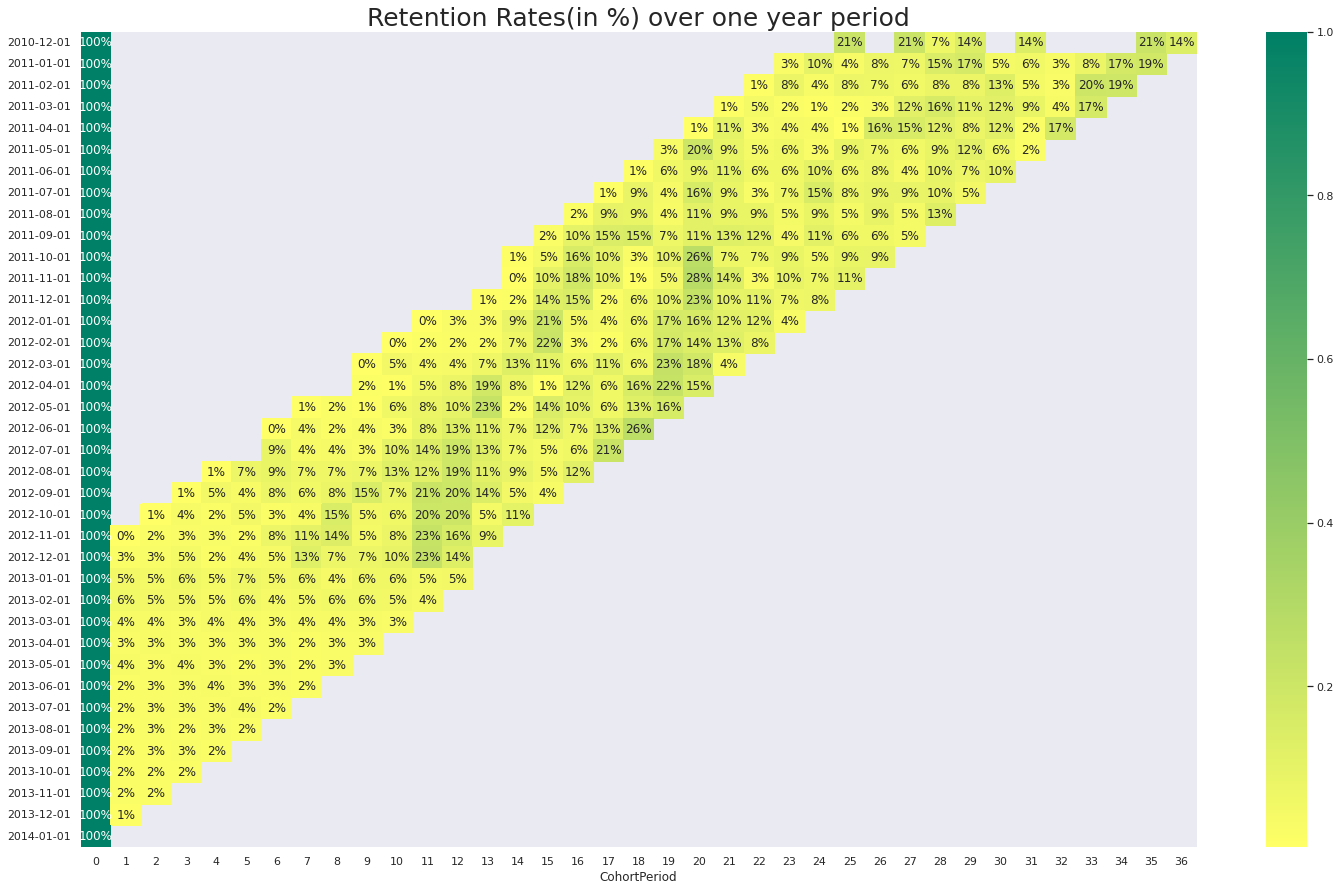

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('Retention Rates(in %) over one year period', size=25)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()

In [ ]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='SalesAmount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,3101.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1201.97,539.99,960.88,NaN,705.22,NaN,NaN,NaN,728.64,1163.74
2011-01-01,3262.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,436.81,698.39,663.60,669.55,384.87,505.17,489.99,666.79,711.26,NaN
2011-02-01,3238.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,606.89,551.94,517.35,684.11,1126.67,523.95,648.37,732.75,NaN,NaN
2011-03-01,3234.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,871.59,674.75,442.32,652.17,355.01,351.38,679.70,NaN,NaN,NaN
2011-04-01,3197.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,662.03,572.35,615.61,620.99,393.18,777.45,NaN,NaN,NaN,NaN
2011-05-01,3228.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,817.93,554.08,529.39,635.34,558.51,NaN,NaN,NaN,NaN,NaN
2011-06-01,3208.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,550.89,505.18,605.80,456.98,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3174.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,599.39,581.73,764.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3184.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,411.71,596.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


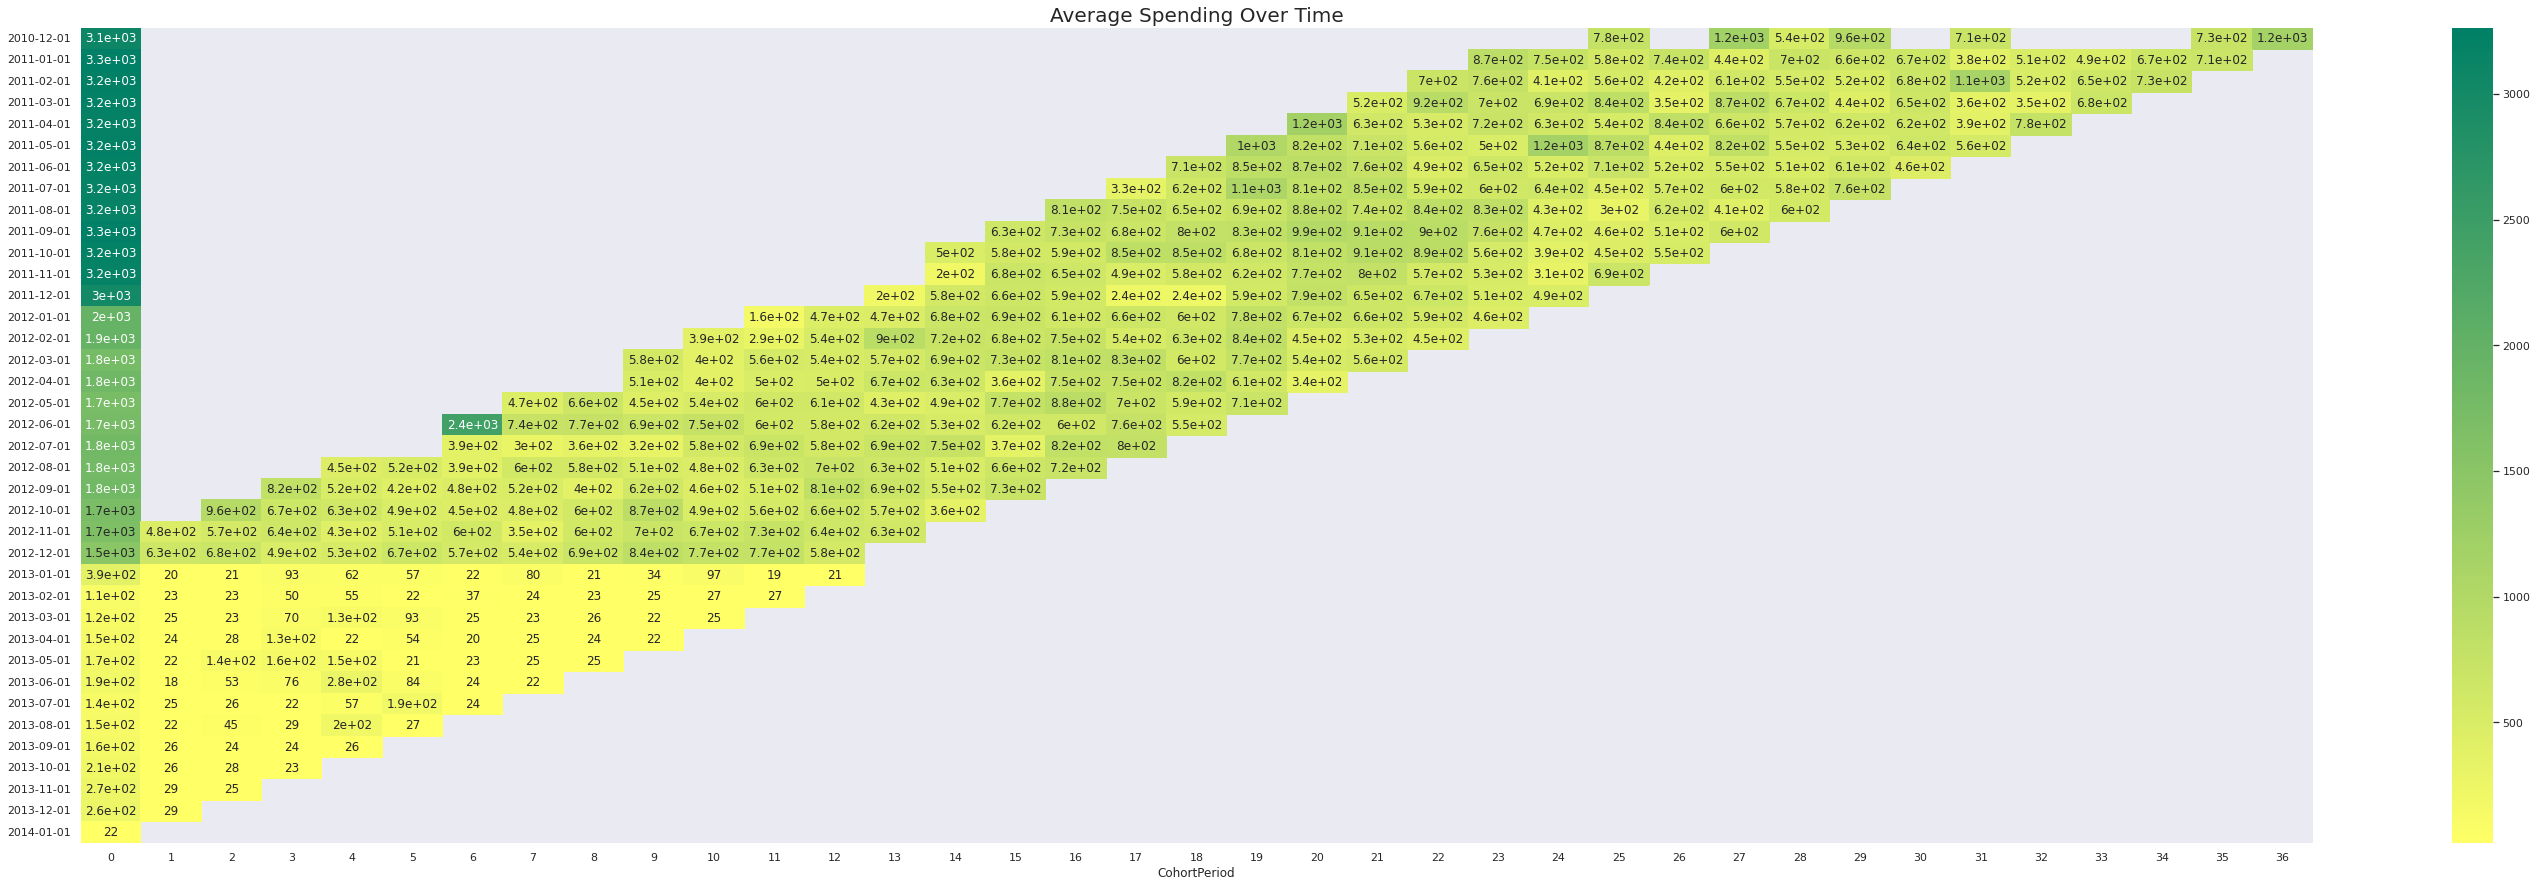

In [ ]:
# Xây dựng bản đồ nhiệt hoặc biểu diễn bằng hình ảnh của bảng trên
amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(50, 15))
plt.title('Average Spending Over Time', size=20)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()